# K - Means Clustering Implementation on Iris Dataset


In [1]:
Registration_Number = "22011103020"
Name = "Jayashre"

# Python Program to Get IP Address
import socket
hostname = socket.gethostname()
IPAddr = socket.gethostbyname(hostname)

print("My name is " + Name + " and my roll no : " + Registration_Number)
print("Computer IP Address is: " + IPAddr)

My name is Jayashre and my roll no : 22011103020
Computer IP Address is: 172.28.0.12


In [29]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

In [30]:
import numpy as np

print(iris_dataset)

print("--------------------------------")
print("Keys of the dataset:", iris_dataset.keys())

print("--------------------------------")
print("Feature names:", iris_dataset.feature_names)

print("--------------------------------")
print("Target names:", iris_dataset.target_names)

print("--------------------------------")
print("Shape of data:", iris_dataset.data.shape)

print("--------------------------------")
print("Shape of target:", iris_dataset.target.shape)

print("--------------------------------")
print("Number of missing values:", np.isnan(iris_dataset.data).sum())

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [45]:
X = iris_dataset.data

<ipython-input-32-b2f4d1394668>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 3], c='blue', cmap='viridis', edgecolor='k', s=50)


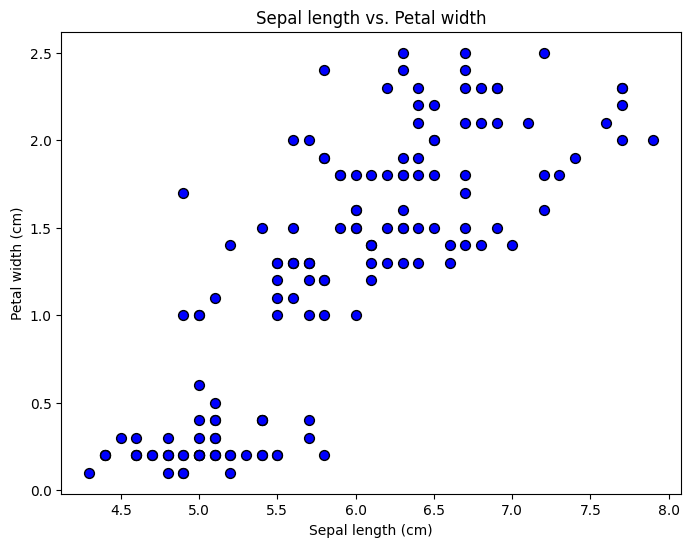

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))


plt.scatter(X[:, 0], X[:, 3], c='blue', cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal width (cm)')
plt.title('Sepal length vs. Petal width')

plt.show()

### Step 1: Choose the number of clusters k

In [33]:
K=3

### Step 2: Select k random points from the data as centroids

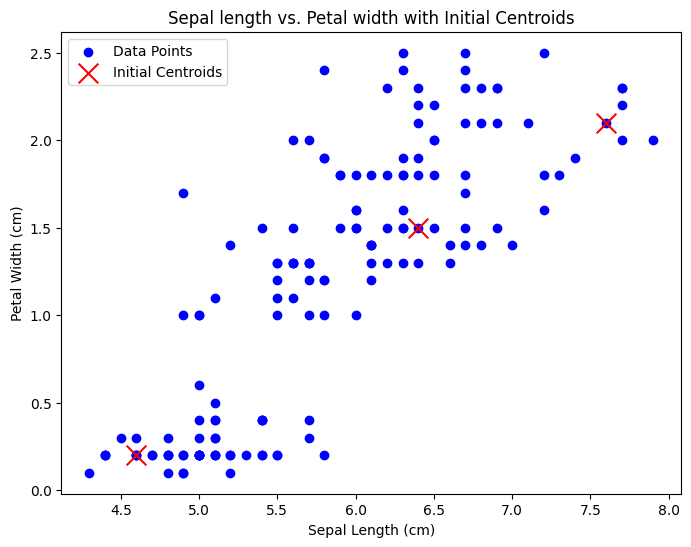

In [37]:
import random as rand
import numpy as np

centroids = []
for i in range(K):
    centroid = X[rand.randint(0, 149)]
    centroids.append(centroid)

centroids = np.array(centroids)  # Convert centroids to a numpy array

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 3], c='blue', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 3], c='red', marker='x', s=200, label='Initial Centroids')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Sepal length vs. Petal width with Initial Centroids')
plt.legend()
plt.show()


## Step 3: Assign all data points to the closest center

In [38]:
def assign_cluster(X, centroids):
    assignments = []

    for data_point in X:
        dist_point_clust = []

        for centroid in centroids:
            d_clust = np.linalg.norm(np.array(data_point) - np.array(centroid))
            dist_point_clust.append(d_clust)

        assignment = np.argmin(dist_point_clust)
        assignments.append(assignment)

    return assignments

## Step 4: Compute the new centroids

In [39]:
def new_centroids(all_vals, centroids, assignments, K):
    new_centroids = []
    for i in range(K):
        pt_cluster = []
        for x in range(len(all_vals)):
                if (assignments[x] == i):
                    pt_cluster.append(all_vals[x])
        mean_c = np.mean(pt_cluster, axis=0)
        new_centroids.append(mean_c)

    return new_centroids

## Step 5: Compute the new centroids

In [47]:
def new_centroids(X, centroids, assignments, K):
    new_centroids = []
    for i in range(K):
        pt_cluster = []
        for x in range(len(X)):
                if (assignments[x] == i):
                    pt_cluster.append(X[x])
        mean_c = np.mean(pt_cluster, axis=0)
        new_centroids.append(mean_c)

    return new_centroids

## Step 6: Compute Sum of Squared Errors

In [41]:
def sse(all_vals, assignments, centroids):
    errors = []

    for i in range(len(all_vals)):

        centroid = centroids[assignments[i]]


        error = np.linalg.norm(np.array(all_vals[i]) - np.array(centroid))


        errors.append(error**2)

    sse = sum(errors)

    return sse

## Step 7: Given a set of assignments of points to clusters, compute the new centroids for every cluster, by taking the mean of all the points assigned to each cluster.

In [42]:
def kmeans_clustering(all_vals, centroids,K,max_iter = 100, tol = pow(10,-3)):
    it = -1
    all_sse = []
    assignments = []


    #Until algorithm converges
    while (len(all_sse)<=1 or (it < max_iter and np.absolute(all_sse[it] - all_sse[it-1])/all_sse[it-1] >= tol)):
        it += 1
        #Assign all data points to the closest center
        assignments = assign_cluster(all_vals, centroids)

        #Compute the new centroids
        centroids = new_centroids(all_vals, centroids, assignments, K)

        #Compute SSE
        sse_kmeans = sse(all_vals, assignments, centroids)
        all_sse.append(sse_kmeans)


    return (assignments, centroids, all_sse, it)

In [48]:
result = kmeans_clustering(X, centroids, K)

In [49]:
centroids_x = [result[1][x][0] for x in range(len(result[1]))]
centroids_y = [result[1][x][3] for x in range(len(result[1]))]

In [50]:
SL = X[:, 0]
PW = X[:, 3]
assignments = result[0]

Text(0, 0.5, 'Petal Width')

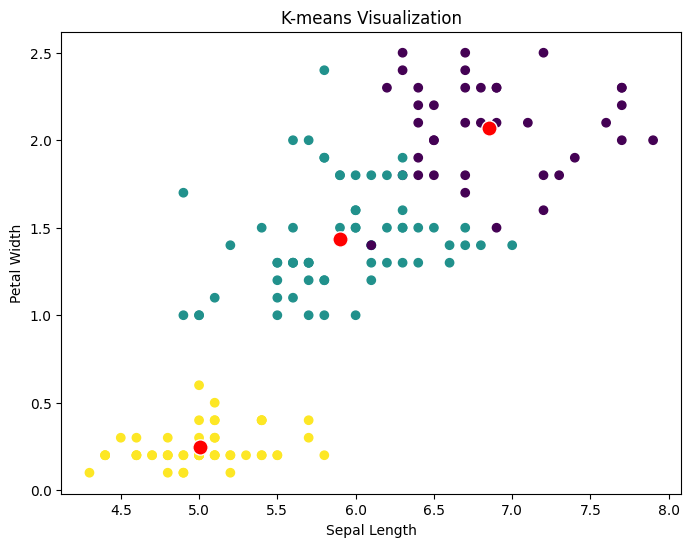

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(SL, PW, c=assignments)
plt.plot(centroids_x,centroids_y, c='white', marker='.', linewidth='0.01', markerfacecolor='red', markersize=22)
plt.title("K-means Visualization")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")